<a href="https://colab.research.google.com/github/EliTirman/Pra3024_2023/blob/main/Updated_Week2_LHCb_Data_Analysis_NoROOT_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install uproot awkward lz4 xxhash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.2/583.2 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import uproot
f = uproot.open("/content/drive/MyDrive/B2HHH_MagnetDown.root:DecayTree")
f.keys()
help(uproot)

Help on package uproot:

NAME
    uproot - Uproot: ROOT I/O in pure Python and NumPy.

DESCRIPTION
    Nearly all of the functions needed for general use are imported here, but the
    documentation gives fully qualified names. For example, the most frequently
    used function in Uproot is
    
    .. code-block:: python
    
        uproot.open("path/to/filename.root")
    
    but we refer to it in the documentation as :doc:`uproot.reading.open`.
    
    Typical entry points for file-reading are
    
    * :doc:`uproot.reading.open`
    * :doc:`uproot.behaviors.TBranch.iterate`
    * :doc:`uproot.behaviors.TBranch.concatenate`
    * :doc:`uproot._dask.dask`
    
    though they would usually be accessed as ``uproot.iterate``,
    ``uproot.concatenate``, and ``uproot.dask``.
    
    The most useful classes are
    
    * :doc:`uproot.behaviors.TBranch.HasBranches` (``TTree`` or ``TBranch``)
    * :doc:`uproot.behaviors.TBranch.TBranch`
    * :doc:`uproot.behaviors.TH1`
    * :doc:`

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

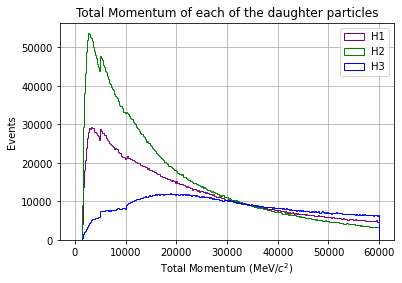

In [24]:
# IMPORTS
from uproot.source.futures import TrivialExecutor
from uproot.models.TTree import numpy as np
from uproot.reading import ReadOnlyDirectory
import math
import matplotlib.pyplot as plt

# (1) Define a list named momenta with all three daughter particles
# (2) Create an empty list TotalMomentum
# (3) Create a for loop that iterates over the list "momenta" in range of its length
# (4) The for loop adds the data from "momenta" to an array "momentum" for all daughters in all 3 directions, so we can malipulate it easier
# (5) Then we square the components of momenta for every daughter, take the square root of the sum of the squares, and append the arrays to "TotalMomentum"
# (5) The loop is repeated until we have 3 data sets contained in "TotalMomentum". 
# (6) Then we plot the histogram using matplotlib and set the variables for it
# (7) Set the title of the histogram
# (8) Set the x axis label
# (9) Set the y axis label
# (10) Add the grid
# (11) Add the legend
# (12) Finally show the histogram

momenta = ["H1", "H2", "H3"]  
TotMom = [] 

for i in range(len(momenta)):  
    momentum = f.arrays([f"{momenta[i]}_PX", f"{momenta[i]}_PY", f"{momenta[i]}_PZ"]) 
    TotMom.append(np.sqrt(momentum[f"{momenta[i]}_PX"]**2 + momentum[f"{momenta[i]}_PY"]**2 + momentum[f"{momenta[i]}_PZ"]**2))
    plt.hist(TotMom[i], bins=300, range=[0, 60000], histtype = 'step', label=momenta[i], edgecolor=["purple","green","blue"][i])

plt.title("Total Momentum of each of the daughter particles")
plt.xlabel('Total Momentum (MeV/$c^2$)')
plt.ylabel('Events')
plt.grid()
plt.legend(loc='upper right')

plt.show()

Now plot the total momentum for the mother (M_Ptot)

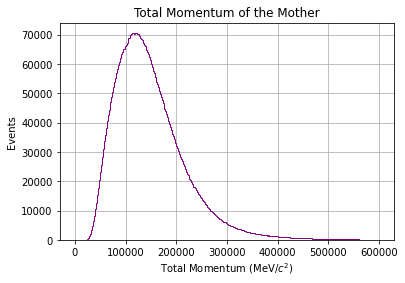

In [8]:
# (1) Define a list of strings named "comp" with names of the components
# (2) Define an empty list momentumcomp
# (3) Create a for loop that iterates over the list "comp" in range of its length 
# (4) and appends all the momentum components arrays in each direction to the list momentumcomp
# (5/6/7) Calculate the sum of components in each direction separately 
# (8) Calculate the TotalMomentum as a square root of the sum of the squares of momenta in each direction
# (9) Then we plot the histogram using matplotlib and set the variables for it
# (10) Set the title of the histogram
# (11) Set the x axis label
# (12) Set the y axis label
# (13) Add the grid
# (14) Finally show the histogram

comp = [ "PX", "PY", "PZ"]
momentumcomp = []

for j in range(len(comp)):
    momentumcomp.append(f.arrays([f"H1_{comp[j]}", f"H2_{comp[j]}", f"H3_{comp[j]}"]))

Xcomp = (momentumcomp[0]["H1_PX"] + momentumcomp[0]["H2_PX"] + momentumcomp[0]["H3_PX"])
Ycomp = (momentumcomp[1]["H1_PY"] + momentumcomp[1]["H2_PY"] + momentumcomp[1]["H3_PY"])
Zcomp = (momentumcomp[2]["H1_PZ"] + momentumcomp[2]["H2_PZ"] + momentumcomp[2]["H3_PZ"])

TotalMomentum = np.sqrt(Xcomp**2 + Ycomp**2 + Zcomp**2)

plt.hist(TotalMomentum, bins=300, range=[0, 600000], histtype = 'step', edgecolor="purple")

plt.title("Total Momentum of the Mother")
plt.xlabel('Total Momentum (MeV/$c^2$)')
plt.ylabel('Events')
plt.grid()
plt.show()



Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

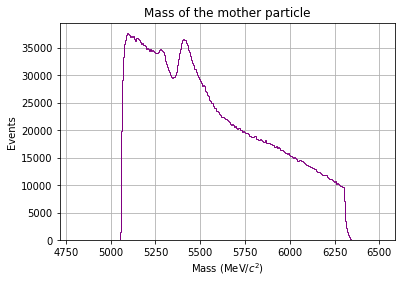

In [9]:
#Now plot a histogram of the range of masses of the B meson.
#Does this match what we would expect from theory?

# (1) Theoretical mass of a Kaon (source: Google)
# (2/3/4) Create Total Energy arrays for each daughter particle and calculate their total energy using theoretical kaon mass
# (5) Calculate Total Energy of the mother particle by summing up all daughter energies
# (6) Since E^2 = m^2 + p^2, Calculate the Total Mass of the mother by taking a square root of the difference of squares of TotalEnergy and TotalMomentum
# (7) Plot the histogram using matplotlib and set the variables for it
# (8) Set the title of the histogram
# (9) Set the x axis label
# (10) Set the y axis label
# (11) Add the grid
# (13) Finally show the histogram

mass = 497.648

TotEn1 = np.sqrt(mass**2 + TotMom[0]**2)
TotEn2 = np.sqrt(mass**2 + TotMom[1]**2)
TotEn3 = np.sqrt(mass**2 + TotMom[2]**2)

TotalEnergy = (TotEn1 + TotEn2 + TotEn3)

Mass = np.sqrt(TotalEnergy**2 - TotalMomentum**2)

plt.hist(Mass, bins=300, range=[4800, 6500], histtype = 'step', edgecolor="purple")
plt.title("Mass of the mother particle")
plt.xlabel('Mass (MeV/$c^2$)')
plt.ylabel('Events')
plt.grid()
plt.show()


We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

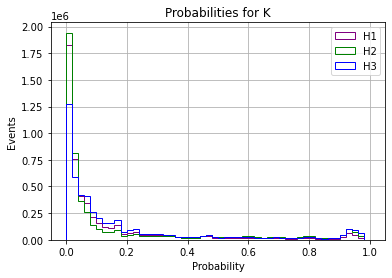

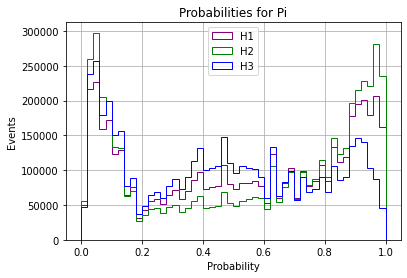

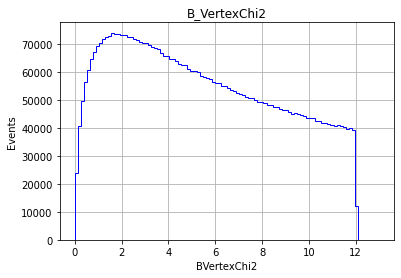

In [10]:
################### Make plots of H1/H2/H3 _ProbK on one plot #################################

# (1/2) Create arrays for the values of probability of each particle being Kaon or Pion
# (3/4/5) Create a for loop that iterates 3 times, gets the values of probability for each particle being a Kaon, 
# (3/4/5) stores it in an array "prob" and then creates a histogram of the probabilities
# (6/7/8/9/10) Setting the histogram parameters

probK = ["H1_ProbK", "H2_ProbK", "H3_ProbK"]
probPi = ["H1_ProbPi", "H2_ProbPi", "H3_ProbPi"]

for i in range(3):
  prob = f[probK[i]].array(library="np")
  plt.hist(prob, bins=50, range=[0, 1], histtype='step', label=f'H{i+1}', edgecolor=["purple", "green", "blue"][i])

plt.title("Probabilities for K")
plt.xlabel('Probability')
plt.ylabel('Events')
plt.grid()
plt.legend(loc='upper right')

################### Make plots of H1/H2/H3 _ProbPi on one plot ################################# 

# Repeat the process but with probabilities of daughters being a Pion:

plt.figure()
for i in range(3):
  prob = f[probPi[i]].array(library="np")
  plt.hist(prob, bins=50, range=[0, 1], histtype='step', label=f'H{i+1}', edgecolor=["purple", "green", "blue"][i])

plt.title("Probabilities for Pi")
plt.xlabel('Probability')
plt.ylabel('Events')
plt.grid()
plt.legend(loc='upper center')


################### For all our particles, make a plot of the B_VertexChi2 #################################

# Create an array B_VertexChi2 that stores the values for B_VertexChi2 and plot the data as a histogram:

plt.figure() 
B_VertexChi2 = f["B_VertexChi2"].array(library="np")

plt.hist(B_VertexChi2, bins=100, range=[0, 13], histtype = 'step', edgecolor="blue")

plt.title("B_VertexChi2")
plt.xlabel('BVertexChi2')
plt.ylabel('Events')
plt.grid()

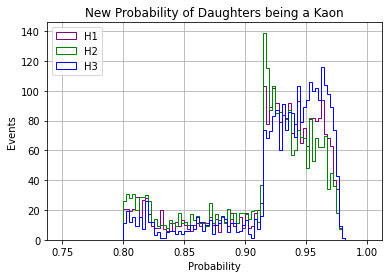

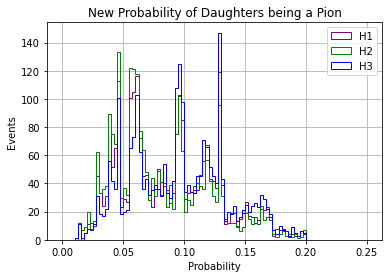

In [11]:
########################## DATA SELECTION ########################

# Define a selection function that checks if the probability values (of being a Kaon) higher than 90% for all 3 daughters, 
# and checks if H1 not a muon. 

def selection1(i):
    return f"(H{i}_ProbK>0.8) & (H{i}_ProbPi<0.2) & (H1_isMuon==0)"

# The selection function is called with different arguments, so we get a string that contains the set of conditions to select data.
Cut = f"{selection1(1)} & {selection1(2)} & {selection1(3)}"

# Create an array with selected data
cut = f.arrays(cut = Cut, library = "np")

# Plot histograms for new probabilities using cut array and the values of probabilities that fall within its range

for i in range (3):
  plt.hist(cut[f"H{i+1}_ProbK"], bins=100, range=[0.75, 1], histtype='step', label=f'H{i+1}', edgecolor=["purple", "green", "blue"][i])

plt.title("New Probability of Daughters being a Kaon")
plt.ylabel("Events")
plt.xlabel("Probability")
plt.grid()
plt.legend(loc='upper left')
plt.show()

plt.figure()
for i in range (3):
  plt.hist(cut[f"H{i+1}_ProbPi"], bins=100, range=[0, 0.25], histtype='step', label=f'H{i+1}', edgecolor=["purple", "green", "blue"][i])

plt.title("New Probability of Daughters being a Pion")
plt.ylabel("Events")
plt.xlabel("Probability")
plt.grid()
plt.legend(loc='upper right')
plt.show()


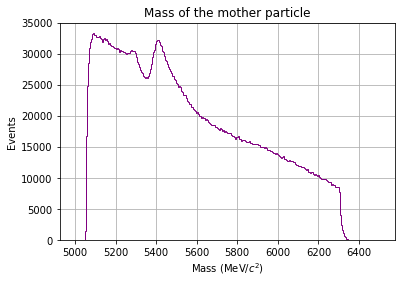

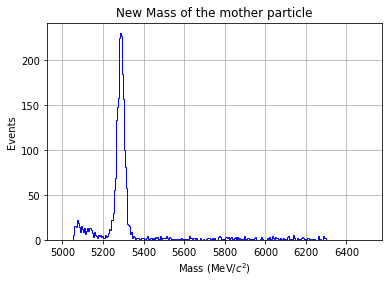

In [43]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?

# Define a function that cuts the data in components of momentum and sums it up for every direction
def MotherMomentumComponentCut(cut, i):
    return cut[f"H1_P{i}"] + cut[f"H2_P{i}"] + cut[f"H3_P{i}"]

# Create new arrays for every component of the mother momentum using the function above and setting parameters cut (which is our selection), 
# and filling the names for the components
NewXcomp = MotherMomentumComponentCut(cut, "X")
NewYcomp = MotherMomentumComponentCut(cut, "Y")
NewZcomp = MotherMomentumComponentCut(cut, "Z")

# Calculate the new total momentum of the mother
NewTotalMomentum = np.sqrt(NewXcomp**2 + NewYcomp**2 + NewZcomp**2)


# Define a function that cuts the data for each daughter in every direction and calculates total momentum for every daughter
def DaugthersMomentumCut(cut, j):
    return np.sqrt((cut[f"H{j}_PX"])**2 + (cut[f"H{j}_PY"])**2 + (cut[f"H{j}_PZ"])**2)

# Create new arrays for total momentum of each H with selected data
NewTotMom1 = DaugthersMomentumCut(cut, "1")
NewTotMom2 = DaugthersMomentumCut(cut, "2")
NewTotMom3 = DaugthersMomentumCut(cut, "3")

# Create new arrays for the new total energies of every daughter
NewTotEn1 = np.sqrt(mass**2 + NewTotMom1**2)
NewTotEn2 = np.sqrt(mass**2 + NewTotMom2**2)
NewTotEn3 = np.sqrt(mass**2 + NewTotMom3**2)

# Calculate the total energy of the mother
NewTotalEnergy = NewTotEn1 + NewTotEn2 + NewTotEn3

# Calculate the mass of the mother
NewMass = np.sqrt(NewTotalEnergy**2 - NewTotalMomentum**2)

# Plot the histograms 

plt.figure()

plt.hist(Mass, bins=300, range=[5000, 6500], histtype = 'step', edgecolor="purple")
plt.title("Mass of the mother particle")
plt.xlabel('Mass (MeV/$c^2$)')
plt.ylabel('Events')
plt.grid()
plt.show()

plt.hist(NewMass, bins=300, range=[5000, 6500], histtype = 'step', edgecolor="blue")

plt.title("New Mass of the mother particle")
plt.xlabel('Mass (MeV/$c^2$)')
plt.ylabel('Events')
plt.grid()
plt.show()

# A theoretical mass of B+ meson is 5279.34±0.12 MeV/c, which falls within the range of our data

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

In [ ]:
import statistics
import scipy.stats as stats

mass = ("Mass", "Mass", 4700, 5900, "MeV/C^2")
# a - amplitude, b - centre of the peak, c - standard deviation
def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))
gaussWidth = (40, (0, 7000))
gaussMean = (4800, (4900, 5900))



In [ ]:
#define physical measurment that we want to fit using RooRealVar
# var = ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
#mass = ROOT.RooRealVar("M_m0","Mass",4700,5900,"MeV/C^{2}")

#passing the rest of the variables into the model
#For the RooRealVar the last three parameters are given, "starting value" and min/max values
gaussMean = RealVar(4800, (4900, 5900))
gaussWidth = (40, (0, 7000))
gaussMean = ROOT.RooRealVar("Mean","Mean",4800,4900,5900)
gaussWidth = ROOT.RooRealVar("Width","Width",40,0,7000)

#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)
#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add the normalisation factors at the end as scaling factors

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )

In [ ]:
#Put our data set into a RooDataSet structure

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", CutTree, ROOT.RooArgSet(mass))

#Then we can do the fitting:

model.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below

In [ ]:
#Now to plot it all
c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [ ]:
#Here do your calculation of the final result

#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter 

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [ ]:
#Make the revised Dalitz plot here for B+ mesons

In [ ]:
#Make the revised Dalitz plot here for B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)